# 2. Undersampling and Oversampling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from imblearn import over_sampling, under_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix, average_precision_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import fraudutils as futils
from fraudutils import classify
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
cc_df = pd.read_csv('../../../data/raw/give-me-some-credit/cs-training.csv')
del cc_df['Unnamed: 0']
cc_df = cc_df.fillna(0)
X_ = cc_df.drop(['SeriousDlqin2yrs'], axis=1)
y_ = cc_df['SeriousDlqin2yrs'].values

# 60/30/10 separation

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.4, random_state=0, stratify=y_)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.25, random_state=0, stratify=y_test)

In [3]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 83984
Fraudulent: 6016

Test Data:
Non-fraudulent: 41992
Fraudulent: 3008


In [4]:
logistic_regression_scores = {}
decision_tree_scores = {}
naive_bayes_scores = {}
knn_scores = {}

## No sampling applied

Logistic regression results:
Mean accuracy: 0.9335111111111111
Mean precision: 0.5425531914893617
Mean recall: 0.0339095744680851
AUPRC: 0.08297552562748352
AUROC: 0.515930782661743


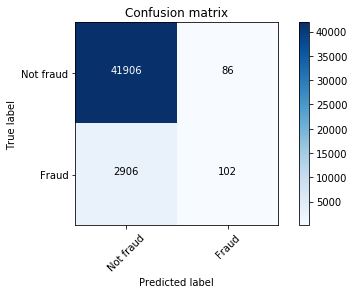

Decision tree results:
Mean accuracy: 0.894
Mean precision: 0.240117994100295
Mean recall: 0.27061170212765956
AUPRC: 0.11373429465051571
AUROC: 0.604633342014487


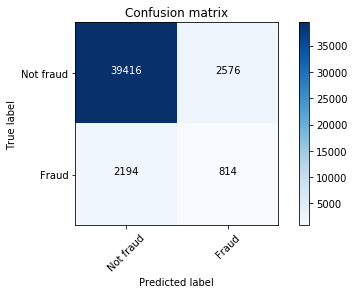

Naive Bayes results:
Mean accuracy: 0.9319333333333333
Mean precision: 0.35135135135135137
Mean recall: 0.02160904255319149
AUPRC: 0.07299236630247269
AUROC: 0.5093756776873406


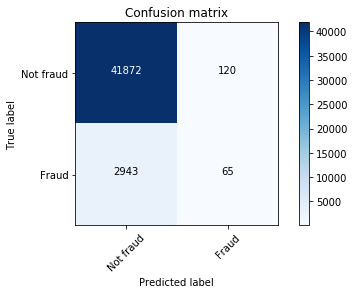

KNN results:
Mean accuracy: 0.9319333333333333
Mean precision: 0.3312883435582822
Mean recall: 0.01795212765957447
AUPRC: 0.0715917750801317
AUROC: 0.5076781975695472


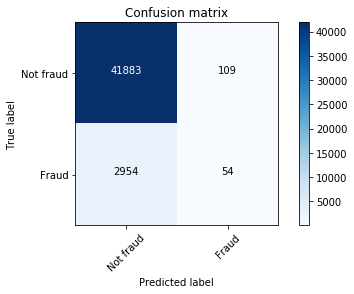

In [5]:
print("Logistic regression results:")
logistic_regression_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Oversampling: Random

In [6]:
ros = over_sampling.RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.7788444444444445
Mean precision: 0.17988198414161902
Mean recall: 0.6486037234042553
AUPRC: 0.1401610135764882
AUROC: 0.7183888306485936


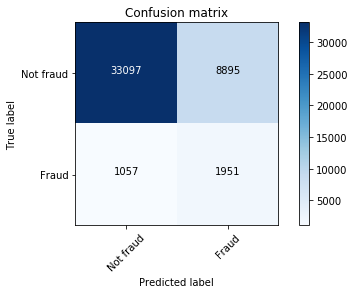

Decision tree results:
Mean accuracy: 0.9004666666666666
Mean precision: 0.24871882473522378
Mean recall: 0.24202127659574468
AUPRC: 0.11086191414247881
AUROC: 0.5948270795247728


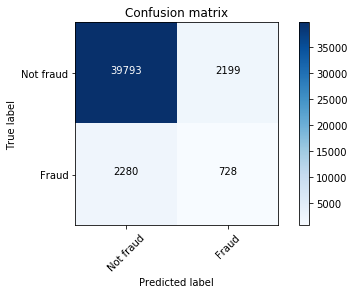

Naive Bayes results:
Mean accuracy: 0.9275111111111111
Mean precision: 0.28691275167785235
Mean recall: 0.056848404255319146
AUPRC: 0.079354976537833
AUROC: 0.5233637144157145


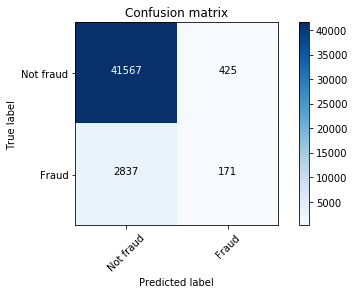

KNN results:
Mean accuracy: 0.8265777777777777
Mean precision: 0.1132258064516129
Mean recall: 0.23337765957446807
AUPRC: 0.07766881815755357
AUROC: 0.5512239793395297


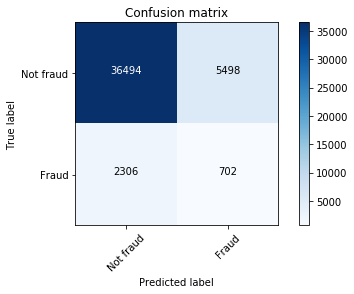

In [7]:
print("Logistic regression results:")
logistic_regression_scores['random_os'] = classify(X_oversampled,
                                                     X_test,
                                                     y_oversampled,
                                                     y_test,
                                                     classifier=LogisticRegression(),
                                                     normalized=False)
print("Decision tree results:")
decision_tree_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Oversampling: SMOTE

In [8]:
smote = over_sampling.SMOTE(random_state=0)
X_oversampled, y_oversampled = smote.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.8070666666666667
Mean precision: 0.19883227176220808
Mean recall: 0.6226728723404256
AUPRC: 0.14902968399436842
AUROC: 0.7214740814359777


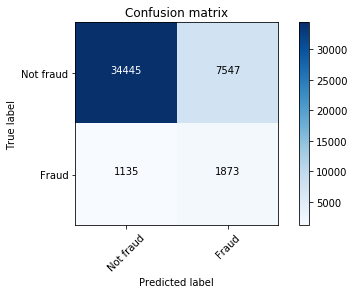

Decision tree results:
Mean accuracy: 0.8915777777777778
Mean precision: 0.24235747727898652
Mean recall: 0.2925531914893617
AUPRC: 0.11819134234816685
AUROC: 0.6135203564610078


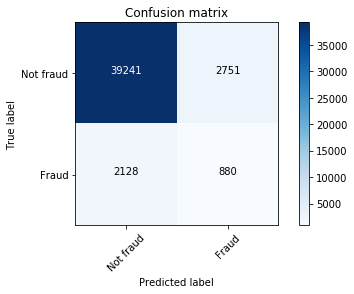

Naive Bayes results:
Mean accuracy: 0.9322
Mean precision: 0.4567404426559356
Mean recall: 0.07546542553191489
AUPRC: 0.09626811186266535
AUROC: 0.5345178146901335


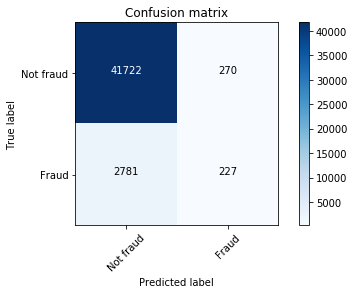

KNN results:
Mean accuracy: 0.7478
Mean precision: 0.10375296912114014
Mean recall: 0.363031914893617
AUPRC: 0.0802434168337236
AUROC: 0.5691969443014475


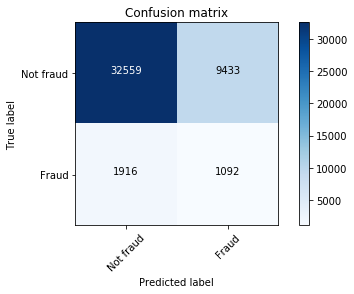

In [9]:
print("Logistic regression results:")
logistic_regression_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier(), normalized=False)


## Oversampling: ADASYN

In [10]:
adasyn = over_sampling.ADASYN(random_state=0)
X_oversampled, y_oversampled = adasyn.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.8107111111111112
Mean precision: 0.20293293077420746
Mean recall: 0.6256648936170213
AUPRC: 0.15199023276645707
AUROC: 0.7248156817103967


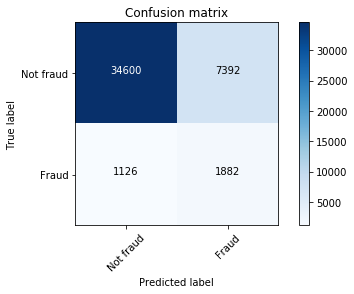

Decision tree results:
Mean accuracy: 0.8902666666666667
Mean precision: 0.23194444444444445
Mean recall: 0.277593085106383
AUPRC: 0.11267506279550826
AUROC: 0.605873604850772


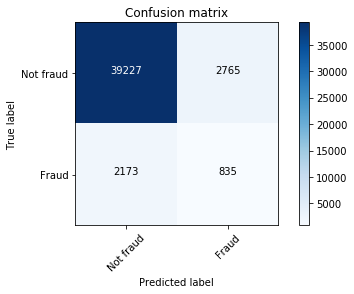

Naive Bayes results:
Mean accuracy: 0.7646666666666667
Mean precision: 0.14011771406872983
Mean recall: 0.49069148936170215
AUPRC: 0.10279901424678661
AUROC: 0.6374918677519124


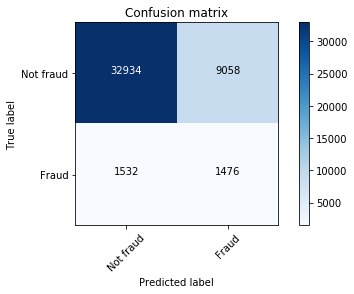

KNN results:
Mean accuracy: 0.7436888888888888
Mean precision: 0.10233208955223881
Mean recall: 0.3646941489361702
AUPRC: 0.07978658097478036
AUROC: 0.5677657256397368


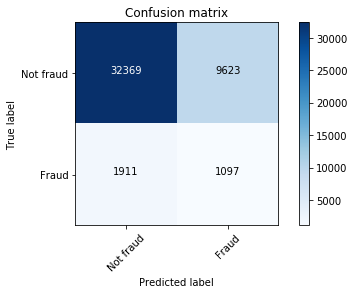

In [11]:
print("Logistic regression results:")
logistic_regression_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Undersampling: Random

In [12]:
rus = under_sampling.RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.7568444444444444
Mean precision: 0.16568346536322265
Mean recall: 0.6535904255319149
AUPRC: 0.13144468218590652
AUROC: 0.7089156166524121


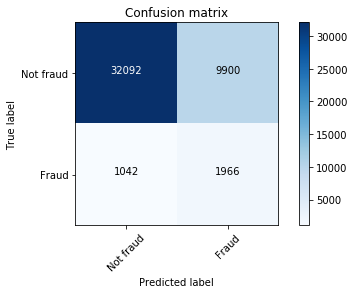

Decision tree results:
Mean accuracy: 0.6926222222222223
Mean precision: 0.14011171698364144
Mean recall: 0.7004654255319149
AUPRC: 0.11816563568117586
AUROC: 0.6962629089938104


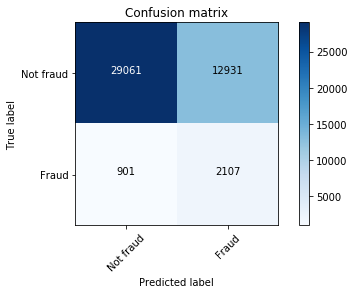

Naive Bayes results:
Mean accuracy: 0.9264666666666667
Mean precision: 0.23550087873462214
Mean recall: 0.04454787234042553
AUPRC: 0.07435772974859464
AUROC: 0.517094378159163


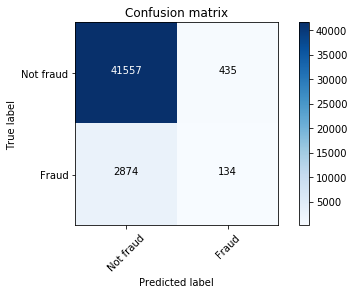

KNN results:
Mean accuracy: 0.6010444444444445
Mean precision: 0.09021113243761997
Mean recall: 0.546875
AUPRC: 0.07962310194071232
AUROC: 0.5758998737854829


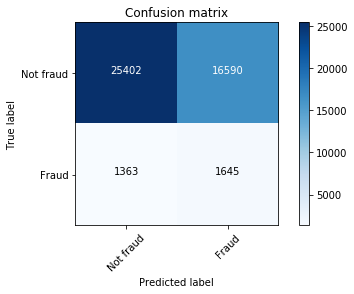

In [13]:
print("Logistic regression results:")
logistic_regression_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Scores

### Logistic regression scores

In [14]:
logistic_regression_df = pd.DataFrame(logistic_regression_scores)
logistic_regression_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.082976,0.140161,0.149030,0.151990,0.131445
AUROC,0.515931,0.718389,0.721474,0.724816,0.708916
accuracy,0.933511,0.778844,0.807067,0.810711,0.756844
precision,0.542553,0.179882,0.198832,0.202933,0.165683
recall,0.033910,0.648604,0.622673,0.625665,0.653590


### Decision tree scores

In [15]:
decision_tree_df = pd.DataFrame(decision_tree_scores)
decision_tree_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.113734,0.110862,0.118191,0.112675,0.118166
AUROC,0.604633,0.594827,0.613520,0.605874,0.696263
accuracy,0.894000,0.900467,0.891578,0.890267,0.692622
precision,0.240118,0.248719,0.242357,0.231944,0.140112
recall,0.270612,0.242021,0.292553,0.277593,0.700465


### Naive Bayes scores

In [16]:
naive_bayes_df = pd.DataFrame(naive_bayes_scores)
naive_bayes_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.072992,0.079355,0.096268,0.102799,0.074358
AUROC,0.509376,0.523364,0.534518,0.637492,0.517094
accuracy,0.931933,0.927511,0.932200,0.764667,0.926467
precision,0.351351,0.286913,0.456740,0.140118,0.235501
recall,0.021609,0.056848,0.075465,0.490691,0.044548


### KNN scores

In [17]:
knn_df = pd.DataFrame(knn_scores)
knn_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.071592,0.077669,0.080243,0.079787,0.079623
AUROC,0.507678,0.551224,0.569197,0.567766,0.575900
accuracy,0.931933,0.826578,0.747800,0.743689,0.601044
precision,0.331288,0.113226,0.103753,0.102332,0.090211
recall,0.017952,0.233378,0.363032,0.364694,0.546875
